## Import

In [1]:
import pandas as pd
import random
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier

In [2]:
class CFG:
    SEED = 42

In [3]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
seed_everything(CFG.SEED) # Seed 고정

## Data Load

In [4]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [5]:
!unzip -qq "/content/gdrive/MyDrive/유전체 정보 품종 분류 AI 경진대회.zip"

In [50]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

class = target

In [51]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      262 non-null    object
 1   father  262 non-null    int64 
 2   mother  262 non-null    int64 
 3   gender  262 non-null    int64 
 4   trait   262 non-null    int64 
 5   SNP_01  262 non-null    object
 6   SNP_02  262 non-null    object
 7   SNP_03  262 non-null    object
 8   SNP_04  262 non-null    object
 9   SNP_05  262 non-null    object
 10  SNP_06  262 non-null    object
 11  SNP_07  262 non-null    object
 12  SNP_08  262 non-null    object
 13  SNP_09  262 non-null    object
 14  SNP_10  262 non-null    object
 15  SNP_11  262 non-null    object
 16  SNP_12  262 non-null    object
 17  SNP_13  262 non-null    object
 18  SNP_14  262 non-null    object
 19  SNP_15  262 non-null    object
 20  class   262 non-null    object
dtypes: int64(4), object(17)
memory usage: 43.1+ KB


In [52]:
train.columns

Index(['id', 'father', 'mother', 'gender', 'trait', 'SNP_01', 'SNP_02',
       'SNP_03', 'SNP_04', 'SNP_05', 'SNP_06', 'SNP_07', 'SNP_08', 'SNP_09',
       'SNP_10', 'SNP_11', 'SNP_12', 'SNP_13', 'SNP_14', 'SNP_15', 'class'],
      dtype='object')

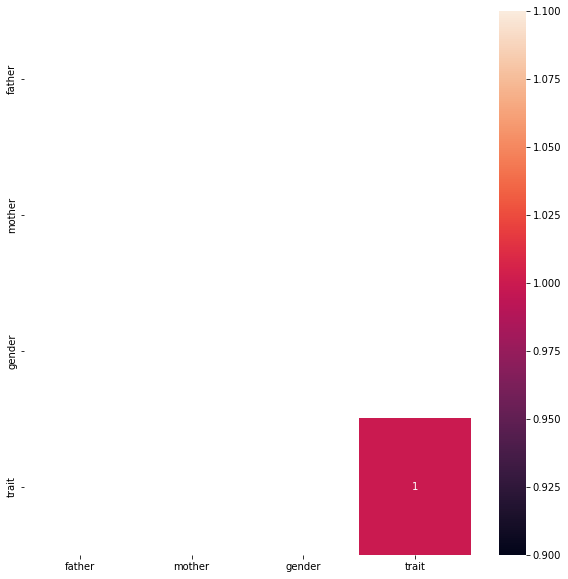

In [53]:
#상관분석하기
#각 변수가 어떤 상관 관계가 있는지. 수치가 높을수록 관계가 있다는 것이다.
fig = plt.figure(figsize = (10,10))
sns.heatmap(train.corr(), annot = True)
plt.show()

In [54]:
def get_x_y(df):
    if 'class' in df.columns:
        df_x = df.drop(columns=['id', 'class','father','mother','gender'])
        df_y = df['class']
        return df_x, df_y
    else:
        df_x = df.drop(columns=['id','father','mother','gender'])
        return df_x

In [55]:
train_x, train_y = get_x_y(train)
test_x = get_x_y(test)

In [56]:
train_y

0      B
1      C
2      B
3      A
4      C
      ..
257    B
258    C
259    A
260    A
261    B
Name: class, Length: 262, dtype: object

In [57]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   trait   262 non-null    int64 
 1   SNP_01  262 non-null    object
 2   SNP_02  262 non-null    object
 3   SNP_03  262 non-null    object
 4   SNP_04  262 non-null    object
 5   SNP_05  262 non-null    object
 6   SNP_06  262 non-null    object
 7   SNP_07  262 non-null    object
 8   SNP_08  262 non-null    object
 9   SNP_09  262 non-null    object
 10  SNP_10  262 non-null    object
 11  SNP_11  262 non-null    object
 12  SNP_12  262 non-null    object
 13  SNP_13  262 non-null    object
 14  SNP_14  262 non-null    object
 15  SNP_15  262 non-null    object
dtypes: int64(1), object(15)
memory usage: 32.9+ KB


## Data Pre-processing
### Label-Encoding

In [58]:
class_le = preprocessing.LabelEncoder()
snp_le = preprocessing.LabelEncoder()
snp_col = [f'SNP_{str(x).zfill(2)}' for x in range(1,16)]

In [59]:
snp_col

['SNP_01',
 'SNP_02',
 'SNP_03',
 'SNP_04',
 'SNP_05',
 'SNP_06',
 'SNP_07',
 'SNP_08',
 'SNP_09',
 'SNP_10',
 'SNP_11',
 'SNP_12',
 'SNP_13',
 'SNP_14',
 'SNP_15']

In [60]:
snp_data = []
for col in snp_col:
    snp_data += list(train_x[col].values)

In [61]:
train_y = class_le.fit_transform(train_y)
snp_le.fit(snp_data)

LabelEncoder()

In [62]:
for col in train_x.columns:
    if col in snp_col:
        train_x[col] = snp_le.transform(train_x[col])
        test_x[col] = snp_le.transform(test_x[col])

In [63]:
train_x

,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,SNP_06,SNP_07,SNP_08,SNP_09,SNP_10,SNP_11,SNP_12,SNP_13,SNP_14,SNP_15
0,2,5,1,0,4,2,0,0,5,0,5,1,0,0,0,0
1,2,1,1,2,0,0,1,0,4,0,1,0,4,5,0,0
2,2,5,5,0,4,3,5,0,4,4,1,0,0,0,0,0
3,1,0,5,0,4,0,5,5,0,5,1,5,5,5,0,5
4,2,5,5,3,0,3,0,0,0,0,5,0,0,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,2,1,1,0,4,3,1,0,4,0,5,1,4,0,0,0
258,2,5,0,2,0,0,1,4,4,0,1,1,0,1,0,4
259,1,1,5,0,4,0,1,5,4,4,0,5,5,5,2,5
260,1,0,5,0,4,0,5,5,0,4,1,1,4,5,2,5


In [64]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [65]:
train_x = scaler.fit_transform(train_x)

In [66]:
train_x

array([[ 0.59792387,  0.91583477, -0.65573371, ..., -1.16766565,
        -0.62776615, -1.18617451],
       [ 0.59792387, -0.88153384, -0.65573371, ...,  1.11538212,
        -0.62776615, -1.18617451],
       [ 0.59792387,  0.91583477,  1.17682343, ..., -1.16766565,
        -0.62776615, -1.18617451],
       ...,
       [-1.67245372, -0.88153384,  1.17682343, ...,  1.11538212,
         1.2307054 ,  1.11588268],
       [-1.67245372, -1.33087599,  1.17682343, ...,  1.11538212,
         1.2307054 ,  1.11588268],
       [ 0.59792387,  0.91583477, -0.65573371, ...,  1.11538212,
        -0.62776615,  0.65547125]])

In [67]:
test_x = scaler.fit_transform(test_x)

In [68]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5) # 주성분을 몇개로 할지 결정

In [69]:
printcipalComponents = pca.fit_transform(train_x)
principalDf = pd.DataFrame(data=printcipalComponents, columns = ['1','2','3','4','5'])
# 주성분으로 이루어진 데이터 프레임 구성

In [70]:
principalDf.head()

,1,2,3,4,5
0,-2.361549,-0.790745,1.003956,-0.669485,-0.130313
1,-0.732577,1.841355,-0.658612,-1.710856,-0.800636
2,-0.572846,-1.754980,1.993748,-0.092818,1.564566
3,4.666182,-0.516880,-0.526590,-0.165389,0.463132
4,-2.124094,0.098980,0.098563,2.116712,0.056613


In [71]:
sum(pca.explained_variance_ratio_)

0.7110293149899476

In [72]:
test_x

array([[-1.55928591, -0.75727861,  1.06315552, ...,  1.12530987,
         1.08558522,  0.61628998],
       [ 0.6413192 ,  1.02755314, -0.73880299, ..., -1.12788495,
        -0.65732683, -1.23522499],
       [ 0.6413192 ,  1.02755314, -0.73880299, ...,  1.12530987,
        -0.65732683,  1.07916873],
       ...,
       [ 0.6413192 ,  1.02755314, -1.18929261, ..., -0.67724598,
        -0.65732683,  1.07916873],
       [ 0.6413192 , -0.75727861,  1.06315552, ..., -1.12788495,
        -0.65732683, -1.23522499],
       [ 0.6413192 ,  1.02755314,  1.06315552, ..., -1.12788495,
        -0.65732683, -1.23522499]])

## Model Fit

In [73]:
from lightgbm import LGBMClassifier

lgb = LGBMClassifier()

lgb.fit(train_x, train_y)

LGBMClassifier()

## Inference

In [74]:
preds = lgb.predict(test_x)
print('Done.')

Done.


## Submission

In [75]:
submit = pd.read_csv('/content/sample_submission.csv')

In [76]:
submit['class'] = class_le.inverse_transform(preds)

In [77]:
submit

,id,class
0,TEST_000,A
1,TEST_001,B
2,TEST_002,C
3,TEST_003,B
4,TEST_004,A
...,...,...
170,TEST_170,B
171,TEST_171,C
172,TEST_172,C
173,TEST_173,B


In [78]:
submit.to_csv('./submit.csv', index=False)